Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from library.DataSetLearning import *
from library.DeepLearningTasks import train, test, displayResult,displayResultList
from library.Models import UNet
from library.DataSetSlides import DataSetSlides as DSS
from library. Losses import DiceLoss, FocalLoss

path_slides = '/home/valentin.abadie/Project/Data/Slides/'
path_labels = '/home/valentin.abadie/Project/Data/Labels/'
path_infos = '/home/valentin.abadie/Project/Data/Infos_slides/'

## Loading data

Specifications about data

In [2]:
batch_size = 8
level = 3
size = 128
stride = 128

Loading data

In [3]:
DL = sf.load('/home/valentin.abadie/Project/Data/DataSets/DataSet_Slide_1_Magni_{}_Size_{}_Stride_{}/Dataset.p'.format(level, size, stride))
DL.loaded()
DD = DataSplitter(DL)
DDA = DataAugmentation(DD.datasets['train'], rotation90 = True, rotation180 = True, flip = True)

In [4]:
len(DD.datasets['train'])

1706

Making dataloader

In [5]:
inputs_train = DataLoader(DDA,batch_size=batch_size,shuffle=True)
#inputs_train = DataLoader(DD.datasets['train'],batch_size=batch_size,shuffle=True)
inputs_test = DataLoader(DD.datasets['test'],batch_size=1,shuffle=False)

## Deep learning

Training

In [78]:
#setting parameters for the deep neural network
in_channels = 4
out_channels = 3
depth = 5

dropout_conv = 0.
dropout_upconv = 0.

epochs = 3

criterion = FocalLoss(gamma = 2)

cuda True


0it [00:00, ?it/s]/home/valentin.abadie/Project/Code/library/Losses.py:154: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logpt = F.log_softmax(input)
214it [02:19,  1.54it/s]


Epoch: 0, Loss on train: 0.031867511570453644, Loss on val: 0.01521301455795765


/home/valentin.abadie/anaconda3/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)
214it [02:11,  1.63it/s]


Epoch: 1, Loss on train: 0.01300750207155943, Loss on val: 0.010917821899056435


214it [02:16,  1.56it/s]


Epoch: 2, Loss on train: 0.011627075262367725, Loss on val: 0.010897520929574966


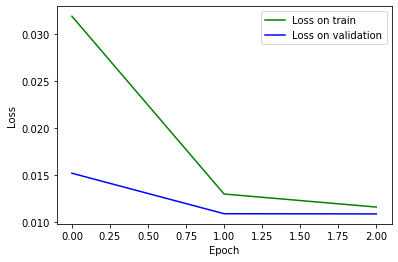

In [6]:
torch.cuda.set_device(1)

#clearing memory
torch.cuda.empty_cache()

#defining model
model = UNet(in_size = in_channels, out_size = out_channels, depth = depth, dropout_lin = 0., dropout_conv = 0.1, dropout_upconv = 0.1)

#training model
unet,list_loss_train,list_loss_test = train(model, inputs_train, inputs_test, epochs = epochs, path_save = '/home/valentin.abadie/Project/Data/DataSets/DataSet_Slide_1_Magni_{}_Size_{}_Stride_{}'.format(level, size, stride), criterion = criterion)

#displaying loss
_, ax = plt.subplots() 
ax.plot(list_loss_train, color = 'green', label = 'Loss on train')
ax.plot(list_loss_test, color = 'blue', label = 'Loss on validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax.legend()

Displays loss on train and val if already trained.

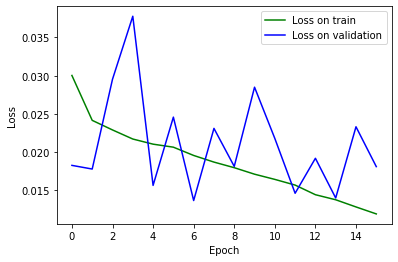

In [79]:
path_to_loss = '/home/valentin.abadie/Project/Data/DataSets/DataSet_Slide_1_Magni_{}_Size_{}_Stride_{}/models/'.format(level, size, stride)
loss_on_train = sf.load(path_to_loss + 'loss_train_batch={}_loss_{}_.p'.format(batch_size, criterion))#, dropout_conv, dropout_upconv))
loss_on_valid = sf.load(path_to_loss + 'loss_valid_batch={}_loss_{}_.p'.format(batch_size, criterion))#, dropout_conv, dropout_upconv))

_, ax = plt.subplots() 
ax.plot(loss_on_train[1], color = 'green', label = 'Loss on train')
ax.plot(loss_on_valid[1], color = 'blue', label = 'Loss on validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax.legend()

Testing

In [71]:
best_epoch = np.argmin(loss_on_valid[1])
print('Best epoch : {}, loss on validation : {}'.format(best_epoch, loss_on_valid[1][best_epoch]))

best_model = torch.load('/home/valentin.abadie/Project/Data/DataSets/DataSet_Slide_1_Magni_{}_Size_{}_Stride_{}'.format(level, size, stride) + '/models/unet_epoch={}_batch={}_loss_{}_.pt'.format(best_epoch, batch_size, criterion))#, 0., 0.))

Best epoch : 6, loss on validation : 0.01365418266505003


0it [00:00, ?it/s]

cuda True


/home/valentin.abadie/Project/Code/library/Metrics.py:45: RuntimeWarning: invalid value encountered in true_divide
  self.confusion_matrix = self.overlap/self.union
/home/valentin.abadie/Project/Code/library/Metrics.py:172: RuntimeWarning: invalid value encountered in true_divide
  self.confusion_matrix_p = self.p_true / self.p_positives
/home/valentin.abadie/Project/Code/library/Metrics.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.confusion_matrix_r = self.g_true / self.g_positives
/home/valentin.abadie/Project/Code/library/Metrics.py:549: RuntimeWarning: invalid value encountered in true_divide
  self.precision = self.p_true / self.p_positives
/home/valentin.abadie/Project/Code/library/Metrics.py:550: RuntimeWarning: invalid value encountered in true_divide
  self.recall = self.g_true / self.g_positives
/home/valentin.abadie/Project/Code/library/Metrics.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.f1_score = 2 * self.precision * s

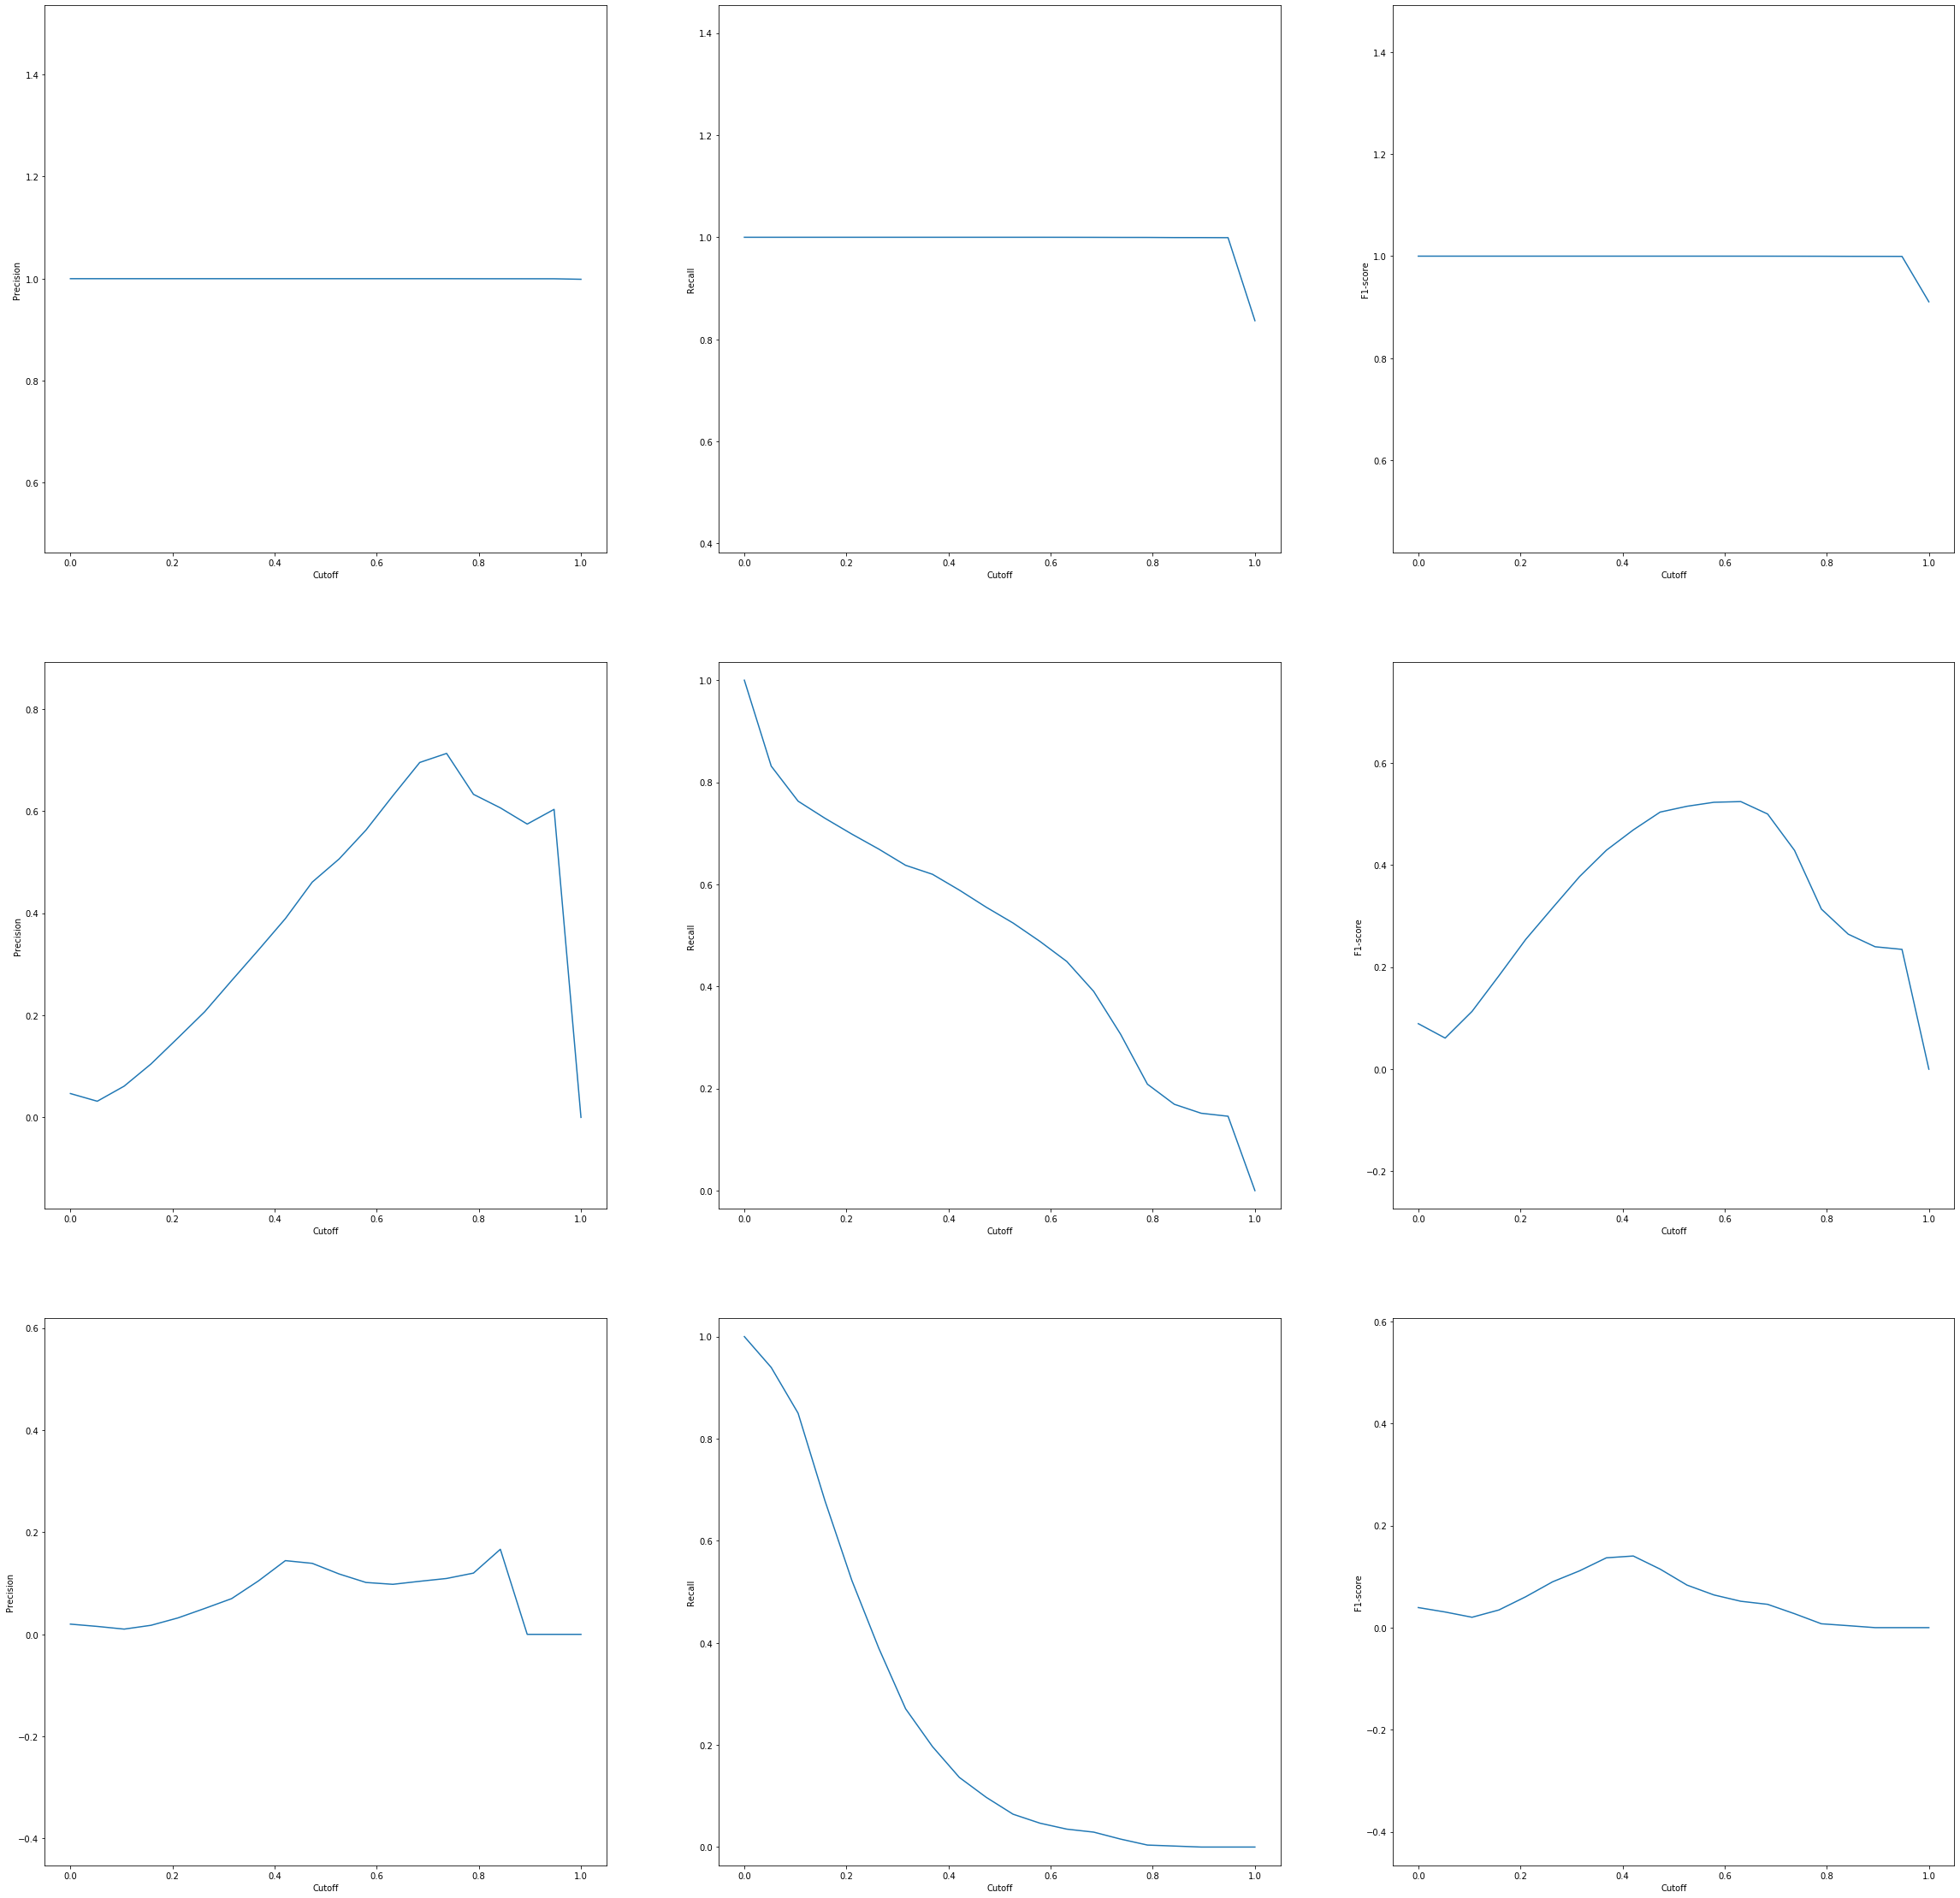

[(0.42105263157894735, 0.9999599823922526), (0.5789473684210527, 0.5242962476861455), (0.3684210526315789, 0.140327430671567)]


{'Jaccard': ['T:0.40', 'P:0.00', 'O:0.99'],
 'Fb-score': ['T:0.49', 'P:0.12', 'O:1.00'],
 'Precision': ['T:0.43', 'P:0.14', 'O:1.00'],
 'Recall': ['T:0.57', 'P:0.10', 'O:1.00'],
 'f1': '[(0.42105263157894735, 0.9999599823922526), (0.5789473684210527, 0.5242962476861455), (0.3684210526315789, 0.140327430671567)]'}

In [73]:
torch.cuda.set_device(1)
torch.cuda.empty_cache()

print(len(inputs_test))

#testing model
test(best_model, inputs_test, ROC = False, threshold = 0.5, n_points_F1 = 20)

Example result on train

In [ ]:
#choosing an example on which to perform result
index = 3
image = DD.datasets['train'][index]['Images']
label = DD.datasets['train'][index]['Labels']

#loading model
unet = torch.load('/home/valentin.abadie/Project/Data/DataSets/DataSet_Test_4/models/unet_epoch=9.pt')

#displaying result of model
displayResult(unet, image, label)

Example result on test

In [8]:
torch.cuda.set_device(0)

#choosing an example on which to perform result
index = 1
image = DD.datasets['test'][index]['Images']
label = DD.datasets['test'][index]['Labels']

inputs_test = DataLoader(DD.datasets['test'],batch_size=1,shuffle=False)
#loading model
#unet = torch.load('/home/valentin.abadie/Project/Data/DataSets/DataSet_Slide_1_Magni_3_Size_128_Stride_128/models/unet_epoch=9_batch=8_loss_focal_.pt')


#displaying result of model
displayResultList(best_model, inputs_test)
#displayResult(best_model, image, label)

0it [00:00, ?it/s]


error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


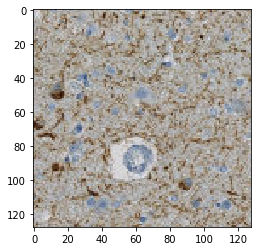

In [11]:
plt.imshow(DDA[6824]['Images'])

In [10]:
1706*4

6824